In [1]:
from learning_agent import robo_scientist
from theories import theory_feynman
from theories import theory_polynomial1D
from theories import theory_nested_formulas
from theories import theory_master
from environments import ohm_law, single_param_linear_law, env_1, sin, tg, arcsin, cos
from data_generator import simple_generator, std_generator
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
feynman_dir = os.path.join(os.getcwd(), 'theories/feynman/')
working_dirs = {
    theory_feynman.TheoryFeynman: feynman_dir,
}

In [3]:
rs = robo_scientist.RoboScientist(working_dirs, keep_full_history=True)

In [4]:
env = single_param_linear_law.LinearLawEnvironment(3, 4, True)
rs.explore_environment(
    env, 
    theory_polynomial1D.TheoryPolynomial1D,
    simple_generator.SimpleGenerator,
    20
)

In [5]:
h = rs.get_history_for_exploration_key(robo_scientist.ExplorationKey(
    single_param_linear_law.LinearLawEnvironment.__name__,
    theory_polynomial1D.TheoryPolynomial1D.__name__,
))
mses = [a.mse for a in h]

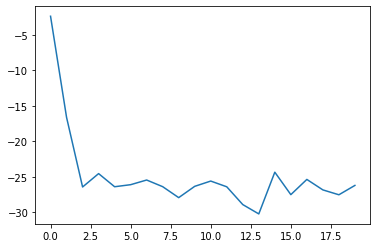

In [6]:
plt.plot(np.log(mses))

In [7]:
def stats_for_env(env_cls, cnt, p_count=5, **params):
    feynman_dir = os.path.join(os.getcwd(), 'theories/feynman/')
    working_dirs = {
        theory_feynman.TheoryFeynman: feynman_dir,
    }
    rs = robo_scientist.RoboScientist(working_dirs, keep_full_history=True)
    theory_cls = [
        theory_feynman.TheoryFeynman, 
        theory_nested_formulas.TheoryNestedFormula,
        theory_polynomial1D.TheoryPolynomial1D,
        theory_master.MasterTheory]
    mses = {}
    for t in theory_cls:
        tt = {}
        if t == theory_polynomial1D.TheoryPolynomial1D:
            tt['params_cnt'] = p_count
        env = env_cls(**params, include_derivatives=t == theory_polynomial1D.TheoryPolynomial1D)
        gen = simple_generator.SimpleGenerator
        if t == theory_master.MasterTheory:
            gen = std_generator.STDGenerator
        rs.explore_environment(env, t, simple_generator.SimpleGenerator, cnt)
        h = rs.get_history_for_exploration_key(robo_scientist.ExplorationKey(
            env_cls.__name__, t.__name__))
        mses[t.__name__] = np.array([a.mse for a in h])
        print(t.__name__)
    
    colors = ['r', 'g', 'b', 'purple']
    plt.figure(figsize=(18,8))
    for i in range(len(mses)):
        m = mses[theory_cls[i].__name__]
        log_mses = np.where(m > 0, np.log(m), -100)
        plt.plot(log_mses, c=colors[i], label=theory_cls[i].__name__)
    plt.title('Environment: {}, params: {}'.format(env_cls.__name__, params))
    plt.xlabel('iterations count')
    plt.ylabel('log MSE')
    plt.legend()
    plt.show()

TheoryFeynman
TheoryNestedFormula
TheoryPolynomial1D
MasterTheory


/Users/juliasemavina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in log
/Users/juliasemavina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: overflow encountered in log
/Users/juliasemavina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: overflow encountered in log


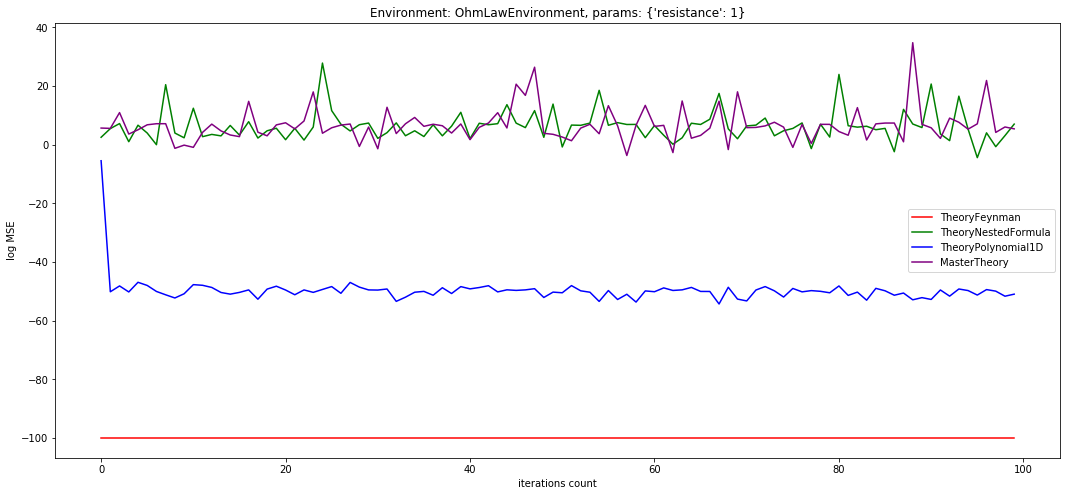

In [8]:
stats_for_env(ohm_law.OhmLawEnvironment, 100, resistance=1)

2020-05-26 20:29:17 - rs.TheoryFeynman - WARNING: Error while reading solution file
2020-05-26 20:29:17 - rs.TheoryFeynman - WARNING: Error while reading solution file
2020-05-26 20:29:17 - rs.TheoryFeynman - WARNING: Error while reading solution file
2020-05-26 20:29:17 - rs.TheoryFeynman - WARNING: Error while reading solution file
2020-05-26 20:29:17 - rs.TheoryFeynman - WARNING: Error while reading solution file
2020-05-26 20:29:17 - rs.TheoryFeynman - WARNING: Error while reading solution file
2020-05-26 20:29:17 - rs.TheoryFeynman - WARNING: Error while reading solution file
2020-05-26 20:29:17 - rs.TheoryFeynman - WARNING: Error while reading solution file
2020-05-26 20:29:17 - rs.TheoryFeynman - WARNING: Error while reading solution file
2020-05-26 20:29:17 - rs.TheoryFeynman - WARNING: Error while reading solution file
2020-05-26 20:29:17 - rs.TheoryFeynman - WARNING: Error while reading solution file
2020-05-26 20:29:17 - rs.TheoryFeynman - WARNING: Error while reading soluti

TheoryFeynman
TheoryNestedFormula
TheoryPolynomial1D
MasterTheory


/Users/juliasemavina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in log
/Users/juliasemavina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in log
/Users/juliasemavina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in log


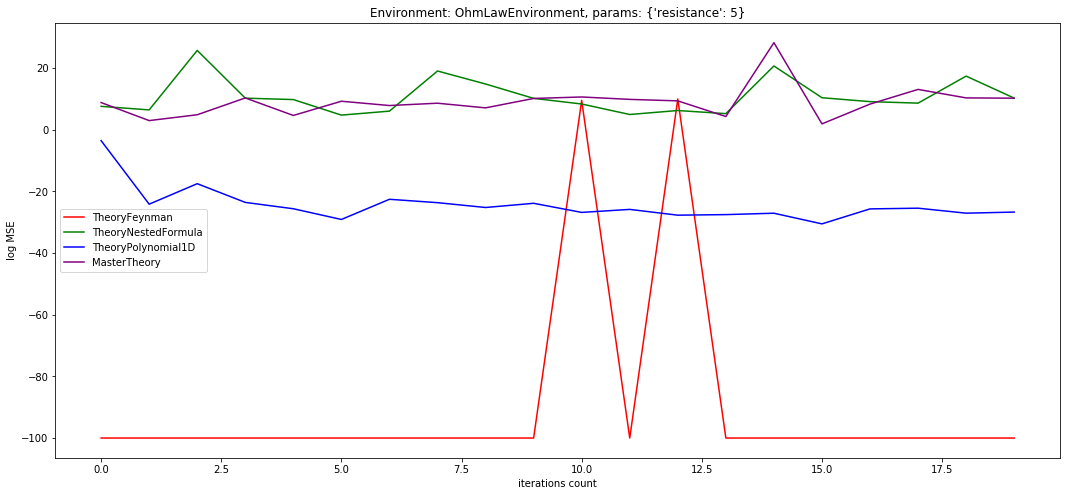

In [37]:
stats_for_env(ohm_law.OhmLawEnvironment, 20, resistance=5)

TheoryFeynman
TheoryNestedFormula
TheoryPolynomial1D
MasterTheory


/Users/juliasemavina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: overflow encountered in log


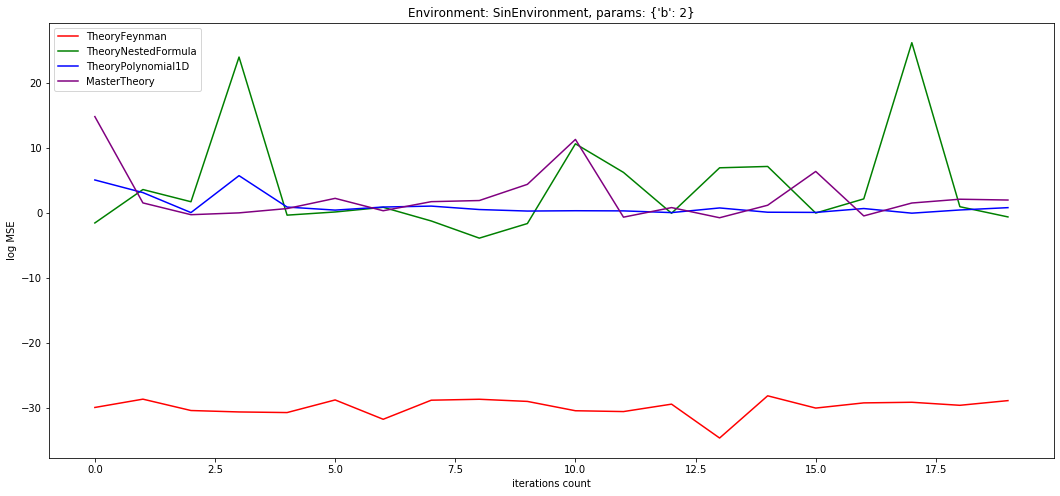

In [5]:
stats_for_env(sin.SinEnvironment, 20, p_count=20, b=2)

TheoryFeynman
TheoryNestedFormula
TheoryPolynomial1D
MasterTheory


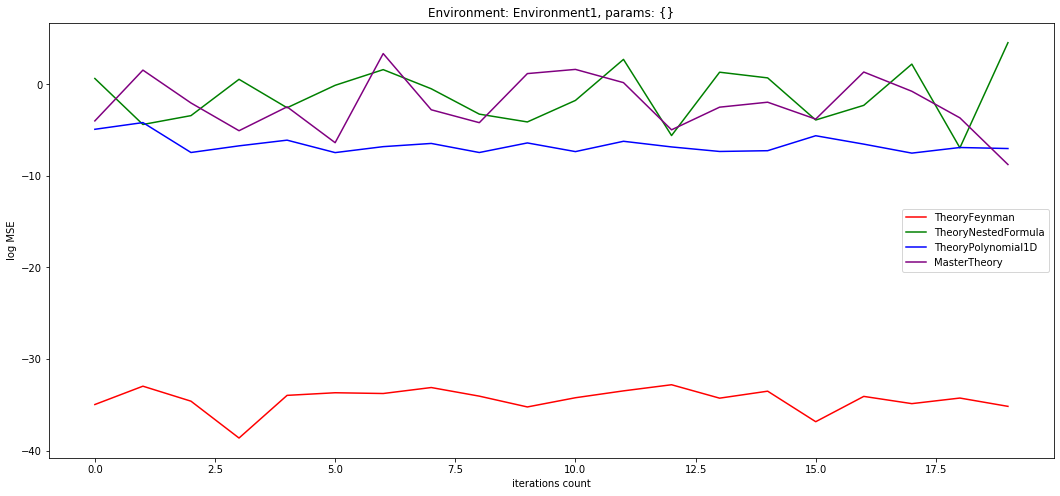

In [4]:
stats_for_env(env_1.Environment1, 20)